In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import os

### Load the dataset

In [75]:
df=pd.read_csv(r"D:\Data Analyst\Machine Learning\Exams\ML-2\credit_card.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [76]:
df.shape

(8950, 18)

In [77]:
df["TENURE"].value_counts()

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [79]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

We see that there is one NULL value for CREDIT_LIMIT and 313 NULL values for MINIMUM_PAYMENTS.

When MINIMUM_PAYMENTS is null, it is assume that no minimum payment was made.This means we can convert all the NULL values in MINIMUM_PAYMENTS to 0.

In [80]:
df.drop(columns=["CUST_ID"],axis=1,inplace=True)

In [81]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [82]:
df=df.fillna(0)

In [83]:
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [84]:
numerical_var = df.dtypes[df.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_var))

categorical_var = df.dtypes[df.dtypes == "object"]
print("Number of Categorical features: ", len(categorical_var))

Number of Numerical features:  17
Number of Categorical features:  0


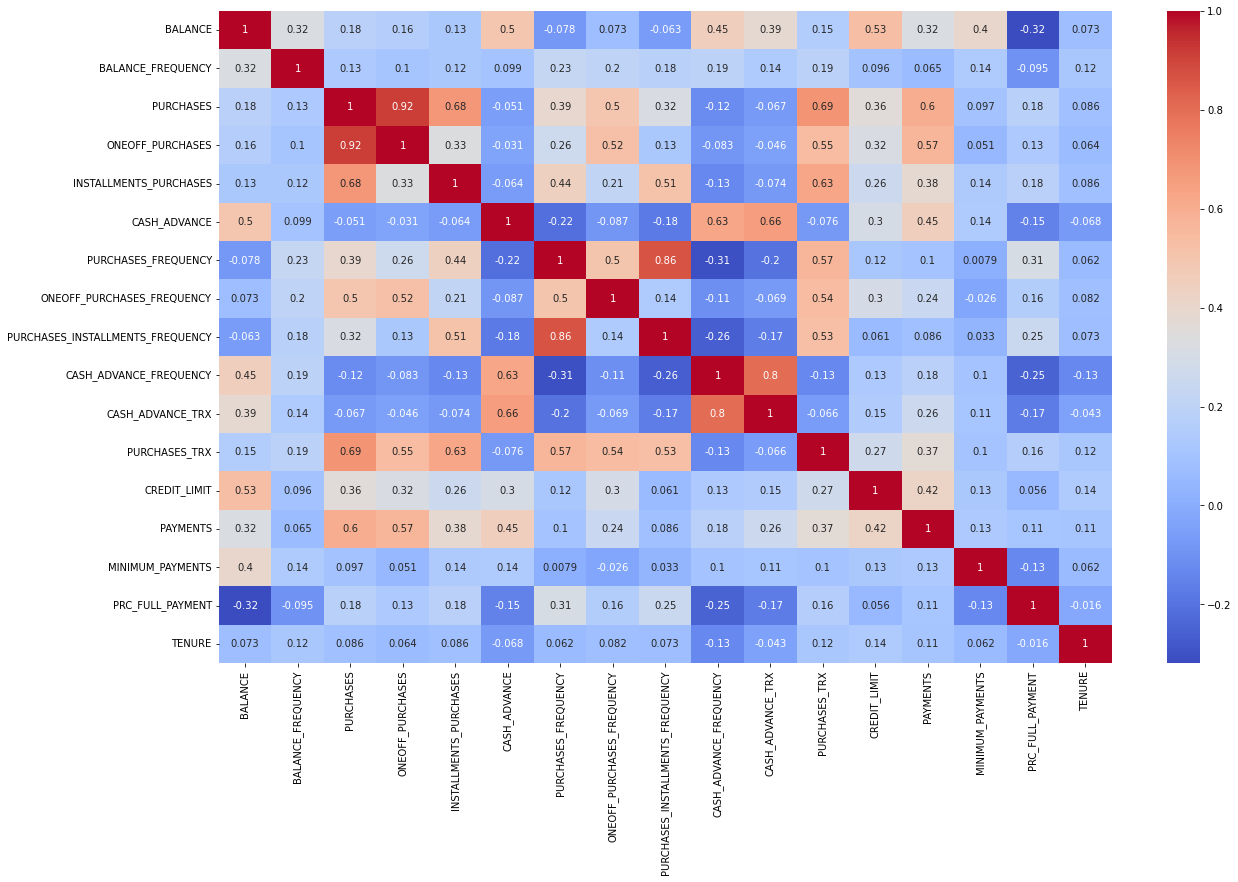

In [85]:
#calculating correlation among numeric variable 
correlation= df.corr() 
plt.figure(figsize=(20,12))
sns.heatmap(correlation,cmap='coolwarm',annot=True);

## Outlier Treatment

In [86]:
df.describe(percentiles=[0.01,.1, .25,.5,.75, .9, .95, .96, .97, .98, .99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
BALANCE,8950.0,1564.474828,2081.531879,0.0,0.065101,23.575529,128.281915,873.385231,2054.140036,4338.563657,5909.111808,6460.903714,7084.980717,7969.618588,9338.804814,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.0,0.090909,0.454545,0.888889,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.0,0.000000,0.000000,39.635000,361.280000,1110.130000,2542.624000,3998.619500,4490.776400,5183.451700,6335.768000,8977.290000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.0,0.000000,0.000000,0.000000,38.000000,577.405000,1600.099000,2671.094000,3076.237200,3609.960800,4432.586800,6689.898200,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.0,0.000000,0.000000,0.000000,89.000000,468.637500,1140.070000,1750.087500,1957.030000,2273.257000,2757.385000,3886.240500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.0,0.000000,0.000000,0.000000,0.000000,1113.821139,3065.534560,4647.169122,5264.207604,6010.909102,7298.609172,9588.163357,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.0,0.000000,0.000000,0.083333,0.500000,0.916667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.0,0.000000,0.000000,0.000000,0.083333,0.300000,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.0,0.000000,0.000000,0.000000,0.166667,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.0,0.000000,0.000000,0.000000,0.000000,0.222222,0.416667,0.583333,0.600000,0.666667,0.750000,0.833333,1.50000


In [87]:
def outlier_capping(x):
    x = x.clip(upper = x.quantile(0.99))
    x = x.clip(lower = x.quantile(0.01))
    return x

In [88]:
df=df.apply(outlier_capping)

In [89]:
df = pd.get_dummies(df, drop_first=False)


In [91]:
df.shape

(8950, 17)

# Apply PCA

In [92]:
from sklearn.preprocessing import StandardScaler  
import numpy as np

# standardized the dataset
sc_df = StandardScaler()  
sc_df_fit=sc_df.fit(df)
df_std = sc_df_fit.transform(df)

In [93]:
df_std1=pd.DataFrame(df_std, columns=df.columns)

In [94]:
df_std1

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.762856,-0.255968,-0.551327,-0.489121,-0.427513,-0.527079,-0.806490,-0.678661,-0.707313,-0.685371,-0.557505,-0.579714,-0.978277,-0.642945,-0.482177,-0.525551,0.360680
1,0.844867,0.132501,-0.613881,-0.489121,-0.568588,3.101370,-1.221758,-0.678661,-0.916995,0.593147,0.166685,-0.675130,0.711333,1.089747,0.271377,0.234227,0.360680
2,0.485181,0.520970,-0.106917,0.215778,-0.568588,-0.527079,1.269843,2.673451,-0.916995,-0.685371,-0.557505,-0.102638,0.852134,-0.456289,-0.088145,-0.525551,0.360680
3,0.063882,-1.032906,0.369006,0.877517,-0.568588,-0.411186,-1.014125,-0.399319,-0.916995,-0.259200,-0.376457,-0.627422,0.852134,-0.732573,-0.594875,-0.525551,0.360680
4,-0.367830,0.520970,-0.603389,-0.474534,-0.568588,-0.527079,-1.014125,-0.399319,-0.916995,-0.685371,-0.557505,-0.627422,-0.921957,-0.431298,-0.397129,-0.525551,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.769165,0.520970,-0.422995,-0.489121,-0.138086,-0.527079,1.269843,-0.678661,1.179833,-0.685371,-0.557505,-0.388884,-0.978277,-0.587964,-0.555384,1.183951,-4.122768
8946,-0.773899,0.520970,-0.417172,-0.489121,-0.124954,-0.527079,1.269843,-0.678661,1.179833,-0.685371,-0.557505,-0.388884,-0.978277,-0.610052,-0.594875,-0.525551,-4.122768
8947,-0.771756,-0.191225,-0.519198,-0.489121,-0.355053,-0.527079,0.854576,-0.678661,0.760469,-0.685371,-0.557505,-0.436591,-0.978277,-0.696478,-0.528296,0.329200,-4.122768
8948,-0.776811,-0.191225,-0.613881,-0.489121,-0.568588,-0.506490,-1.221758,-0.678661,-0.916995,0.166976,-0.195410,-0.675130,-1.119078,-0.709234,-0.549835,0.329200,-4.122768


In [95]:
from sklearn.decomposition import PCA 

In [96]:
from sklearn.decomposition import PCA 
# create instance for pca
sklearn_pca = PCA()
# fit and transform the instance on datad
sklearn_pca_fit=sklearn_pca.fit(df_std1)
pca_result=sklearn_pca_fit.transform(df_std1)

In [98]:
pd.DataFrame(pca_result, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17'])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,-1.773782,-1.405071,0.190195,-0.712168,-0.006741,-0.110037,-0.698820,0.164491,0.339929,0.043885,-0.101192,0.164432,0.087995,0.111961,0.136070,0.057578,-0.006599
1,-1.516522,2.721042,0.601677,0.303583,1.355055,-0.515998,0.591977,0.246409,0.595173,1.156450,-0.407989,1.270446,0.557188,0.442251,-0.464210,-0.074714,0.007166
2,1.032380,-0.293308,0.870785,-1.566775,-1.480624,-0.483032,1.432586,-0.995678,-0.862096,0.423739,-1.091505,-0.342872,0.309949,-0.735715,0.145852,0.426055,-0.010909
3,-0.849645,-0.286800,1.652393,-1.029411,0.399326,0.325749,-0.093096,-0.769573,0.255883,-0.813862,0.895175,0.100035,0.346309,0.033123,-0.046900,-0.007404,-0.025746
4,-1.720330,-0.966160,0.185413,-1.093004,-0.397271,-0.325712,-0.338625,0.499865,0.678945,0.173244,-0.266587,0.170900,-0.091440,0.003744,0.215187,-0.060042,0.008247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.332010,-2.178158,-1.170785,2.765213,-1.454568,2.269199,1.713165,0.734832,0.709169,0.690329,0.437286,-0.206721,-0.163031,-0.075366,0.335480,0.123056,-0.000053
8946,-0.565943,-1.894506,-1.407497,2.065323,-1.943669,2.735998,0.922313,-0.171484,0.992813,1.052122,0.378034,-0.496466,0.008313,0.025423,0.352152,0.154725,-0.004994
8947,-0.950570,-2.049859,-0.712611,2.332669,-1.420497,2.747236,1.174049,0.203189,0.508369,0.695991,0.335559,-0.240339,-0.163636,0.003840,0.339570,0.131254,-0.001588
8948,-2.505124,-1.076888,0.695149,1.982867,-1.614349,2.650992,0.702433,1.003494,0.948892,-0.304373,-0.219276,-0.193663,-0.408968,0.215767,0.121834,-0.152115,0.012111


In [99]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.DataFrame(sklearn_pca_fit.explained_variance_)

,0
0,4.990
1,3.743
2,1.477
3,1.277
4,1.060
5,0.914
6,0.761
7,0.660
8,0.558
9,0.443


In [101]:
var=pd.concat([pd.DataFrame(sklearn_pca_fit.explained_variance_), pd.DataFrame(sklearn_pca_fit.explained_variance_ratio_),pd.DataFrame(sklearn_pca_fit.explained_variance_ratio_).cumsum(axis=0) ], axis=1)
var.columns=["eigen","Ratio", "Ratio_Cum"]
var.to_csv("D:\Data Analyst\Machine Learning\Exams\ML-2\PCA.csv")

In [102]:
eigen=pd.DataFrame({"Eigen":sklearn_pca_fit.explained_variance_, 
              "Ver_expalined":sklearn_pca_fit.explained_variance_ratio_,
             "Cumm_var":sklearn_pca_fit.explained_variance_ratio_.cumsum()})

In [103]:
eigen[eigen["Cumm_var"]<=.95]

,Eigen,Ver_expalined,Cumm_var
0,4.990,0.294,0.294
1,3.743,0.220,0.514
2,1.477,0.087,0.601
3,1.277,0.075,0.676
4,1.060,0.062,0.738
5,0.914,0.054,0.792
6,0.761,0.045,0.837
7,0.660,0.039,0.875
8,0.558,0.033,0.908
9,0.443,0.026,0.934


In [104]:
pd.DataFrame(sklearn_pca_fit.explained_variance_ratio_).to_csv("Variance.csv")

In [106]:
pcs10=PCA(n_components=10)
pcs10_fit=pcs10.fit(df_std1)
df_pcs=pcs10_fit.transform(df_std1)

In [107]:
pc_df=pd.DataFrame(df_pcs, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])

In [108]:
y=df["TENURE"]

In [109]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(pc_df, y) 

LinearRegression()

In [110]:
lr.score(pc_df, y)

0.9960464020422662

# k-means clustering

In [111]:
from sklearn.cluster import KMeans

In [112]:
km=KMeans(n_clusters=3)

km_result=km.fit(df)

In [113]:
km_result.inertia_

139016715802.78738

In [114]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km_result=km.fit(df)
    wcss.append(km_result.inertia_)
    print("Cluster= {} and WCSS ={} ".format(i, km_result.inertia_))

Cluster= 1 and WCSS =270461451536.72467 
Cluster= 2 and WCSS =166739379253.73373 
Cluster= 3 and WCSS =139017090655.37775 
Cluster= 4 and WCSS =121201452546.97546 
Cluster= 5 and WCSS =109414496627.91898 
Cluster= 6 and WCSS =98855129599.4271 
Cluster= 7 and WCSS =90491992767.8343 
Cluster= 8 and WCSS =83636622322.78494 
Cluster= 9 and WCSS =78775112823.09125 
Cluster= 10 and WCSS =73847850280.5646 


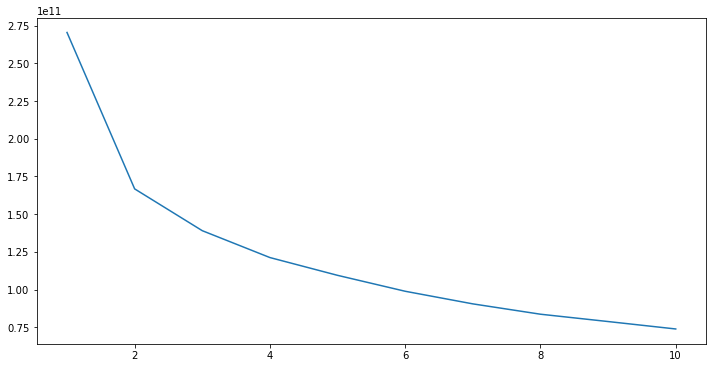

In [116]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11), wcss)
plt.show()

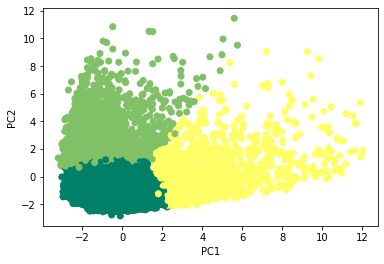

In [117]:
plt.scatter(df_pcs[:,0], df_pcs[:,1],
            c = KMeans(n_clusters = 3).fit_predict(df_pcs),
            cmap = plt.cm.summer)
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show() 